In [4]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from functools import partial as part

er_fast = nx.fast_gnp_random_graph

In [42]:
def deg_dis_plot(degs, *args, plotter=plt, **kwargs):
    km, kM = min(degs), max(degs)
    plotter.plot(range(km, kM+1), (np.bincount(degs)/len(degs))
                 [km:kM+1], *args, **kwargs)


def deg_dis_plot4rng(rng_gnr, *args, trials=10, seed=123456, plotter=plt, **kwargs):
    rngs = [rng_gnr(seed+t) for t in range(trials)]
    degs = [k for g in rngs for n, k in g.degree]
    deg_dis_plot(degs, *args, plotter=plotter, **kwargs)


def deg_dis_plot4er(N, kavg, *args, trials=10, seed=123456, plotter=plt, **kwargs):
    p = kavg/(N-1)
    deg_dis_plot4rng(lambda s: er_fast(N, p, seed=s),
                     *args, trials=trials, seed=seed, plotter=plotter, **kwargs)


In [50]:
def avsp4er(N, kavg, trials=10, seed=123456):
    """Average shortest path length for ER networks"""
    p = kavg/(N-1)
    graphs = [er_fast(N,p,seed=seed+t) for t in range(trials)]
    ls = [nx.average_shortest_path_length(g) for g in graphs]
    lBar = np.mean(ls)
    lstd = np.std(ls)
    l = np.log(N)/np.log(kavg) 
    return (lBar,lstd),l

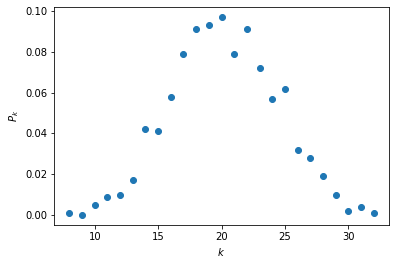

In [45]:
deg_dis_plot4er(100,20,'o',seed=123456)
plt.ylabel("$P_k$")
plt.xlabel("$k$")
plt.show()

In [56]:
avsp4er(1000,20,trials=1,seed=213)

((2.629853853853854, 0.0), 2.3058653605207224)